In [3]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score

In [4]:
from google.colab import files
uploaded = files.upload()

Saving test_midterm.csv to test_midterm.csv
Saving train_midterm.csv to train_midterm.csv


In [5]:
train = pd.read_csv('train_midterm.csv')
test = pd.read_csv('test_midterm.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 1365 entries, ... to label
dtypes: int64(1365)
memory usage: 46.4 MB


In [6]:
input = train.drop('label', axis=1).values
target = train['label'].values

rates = [0.1, 0.01, 0.001]
epochs = [50, 200, 500]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

avg_losses = []

In [7]:
for rate in rates:
  for num_epochs in epochs:
    print(f"Training with learning rate {rate} and {num_epochs} epochs")
    train_losses = []
    val_losses = []

    for train_index, val_index in kfold.split(target):
      x_train = input[train_index]
      x_val = input[val_index]
      y_train = target[train_index]
      y_val = target[val_index]

      w = np.zeros(train.shape[1] - 1)
      best_val_loss = float('inf')
      patience = 10
      count = 0

#function for calculating sigmoid
      def sigmoid(x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

#function for updating weight
      def update_weight(x, y, w):
        y_pred = sigmoid(x.dot(w))
        gradient = -rate*(y-y_pred)*x
        w = w - gradient
        return w

#function for calculating loss (binary cross-entropy)
      def calc_loss(y_true, y_pred):
        epsilon = 1e-15
        loss = -(y_true * np.log(y_pred+epsilon) + (1 - y_true) * np.log(1 - y_pred+epsilon))
        return loss

#training the model
      for epoch in range(num_epochs):
          for i in range(len(x_train)):
            xi = x_train[i]
            yi = y_train[i]
            w = update_weight(xi, yi, w)

          y_pred = sigmoid(x_train.dot(w))
          train_loss = np.mean(calc_loss(y_train, y_pred))

          y_val_pred = sigmoid(x_val.dot(w))
          val_loss = np.mean(calc_loss(y_val, y_val_pred))

          if val_loss < best_val_loss:
            best_val_loss = val_loss
            count = 0
          else:
            count += 1
            if count >= patience:
              train_losses.append(train_loss)
              val_losses.append(val_loss)
              break

          if(epoch == num_epochs-1):
            train_losses.append(train_loss)
            val_losses.append(val_loss)
          # print(f"Epoch {epoch}: Train Loss = {train_loss}, Val Loss = {val_loss}")

    mean_train_loss = np.mean(train_losses)
    mean_val_loss = np.mean(val_losses)
    avg_losses.append((rate, num_epochs, mean_train_loss, mean_val_loss))
    print(f"Average Train Loss: {mean_train_loss:.4f}, Average Val Loss: {mean_val_loss:.4f}")
    print(f"----------------------------------")



Training with learning rate 0.1 and 50 epochs
Average Train Loss: 0.0425, Average Val Loss: 0.1387
----------------------------------
Training with learning rate 0.1 and 200 epochs
Average Train Loss: 0.0425, Average Val Loss: 0.1387
----------------------------------
Training with learning rate 0.1 and 500 epochs
Average Train Loss: 0.0425, Average Val Loss: 0.1387
----------------------------------
Training with learning rate 0.01 and 50 epochs
Average Train Loss: 0.0994, Average Val Loss: 0.1517
----------------------------------
Training with learning rate 0.01 and 200 epochs
Average Train Loss: 0.0574, Average Val Loss: 0.1377
----------------------------------
Training with learning rate 0.01 and 500 epochs
Average Train Loss: 0.0523, Average Val Loss: 0.1371
----------------------------------
Training with learning rate 0.001 and 50 epochs
Average Train Loss: 0.2271, Average Val Loss: 0.2447
----------------------------------
Training with learning rate 0.001 and 200 epochs
Aver

In [8]:

best_hyperparameters = None
best_loss = float('inf')

for rate, num_epochs, train_loss, val_loss in avg_losses:
  if val_loss < best_loss:
    best_loss = val_loss
    best_hyperparameters = (rate, num_epochs)

print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: (0.01, 500)


----------------------------------
Test Loss: 0.17648673471627968
Test Accuracy: 0.9484304932735426
Test F1 Score: 0.7722772277227723


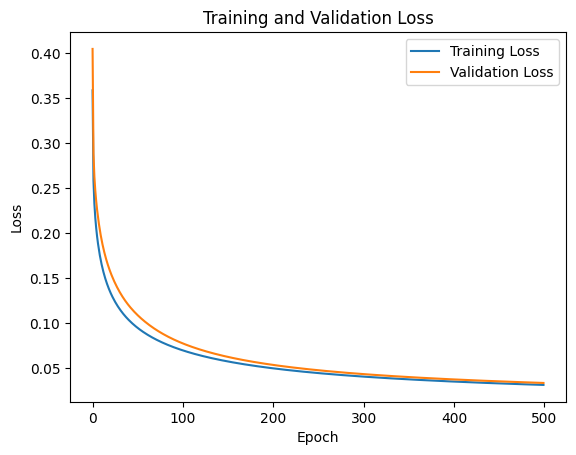

In [9]:
best_rate = best_hyperparameters[0]
best_epochs = best_hyperparameters[1]
w = np.zeros(train.shape[1] - 1)
best_val_loss = float('inf')
patience = 10
count = 0

input = train.drop('label', axis=1).values
target = train['label'].values

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.1, random_state=42)

final_train_losses = []
final_val_losses = []

#function for calculating sigmoid
def sigmoid(x):
  x = np.clip(x, -500, 500)
  return 1 / (1 + np.exp(-x))

#function for updating weight
def update_weight(x, y, w):
  y_pred = sigmoid(x.dot(w))
  gradient = -best_rate*(y-y_pred).dot(x)
  w = w - gradient
  return w

#function for calculating loss (binary cross-entropy)
def calc_loss(y_true, y_pred):
  epsilon = 1e-15
  loss = -(y_true * np.log(y_pred+epsilon) + (1 - y_true) * np.log(1 - y_pred+epsilon))
  return loss

#training the model
for epoch in range(best_epochs):
    w = update_weight(x_train, y_train, w)

    y_pred = sigmoid(x_train.dot(w))
    train_loss = np.mean(calc_loss(y_train, y_pred))
    final_train_losses.append(train_loss)

    y_val_pred = sigmoid(x_val.dot(w))
    val_loss = np.mean(calc_loss(y_val, y_val_pred))
    final_val_losses.append(val_loss)
    if val_loss < best_val_loss:
      best_val_loss = val_loss
      count = 0
    else:
      count += 1
      if count >= patience:
        break

    # print(f"Epoch {epoch}: Train Loss = {train_loss}, Val Loss = {val_loss}")
# print(f"----------------------------------")

y_test_pred = sigmoid(x_test.dot(w))

test_loss = np.mean(calc_loss(y_test, y_test_pred))
print(f"Test Loss: {test_loss}")

test_accuracy = accuracy_score(y_test, y_test_pred >= 0.5)
print(f"Test Accuracy: {test_accuracy}")

f1 = f1_score(y_test, y_test_pred >= 0.5)
print(f"Test F1 Score: {f1}")


plt.plot(final_train_losses, label='Training Loss')
plt.plot(final_val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()